In [5]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [6]:

base=time.time()
model=models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()
print('{:.1f} model loaded'.format(time.time()-base))

6.4 model loaded


In [3]:



base=time.time()
from PIL import Image
from torchvision import transforms

#input_image = Image.open('a.jpg')
input_image = Image.open(r'.\CrackForest\Images\001.jpg')
#input_image=input_image.resize((800,1080))

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print('{:.1f} image processed'.format(time.time()-base))


0.4 image processed


In [7]:


base=time.time()
with torch.no_grad():
    output = model(input_batch)['out'][0]


print('{:.1f} model predicted'.format(time.time()-base))
# create a color pallette, selecting a color for each class


3.1 model predicted


In [8]:
output_predictions = output.argmax(0)

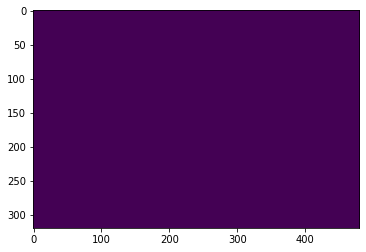

In [9]:
plt.imshow(output_predictions)

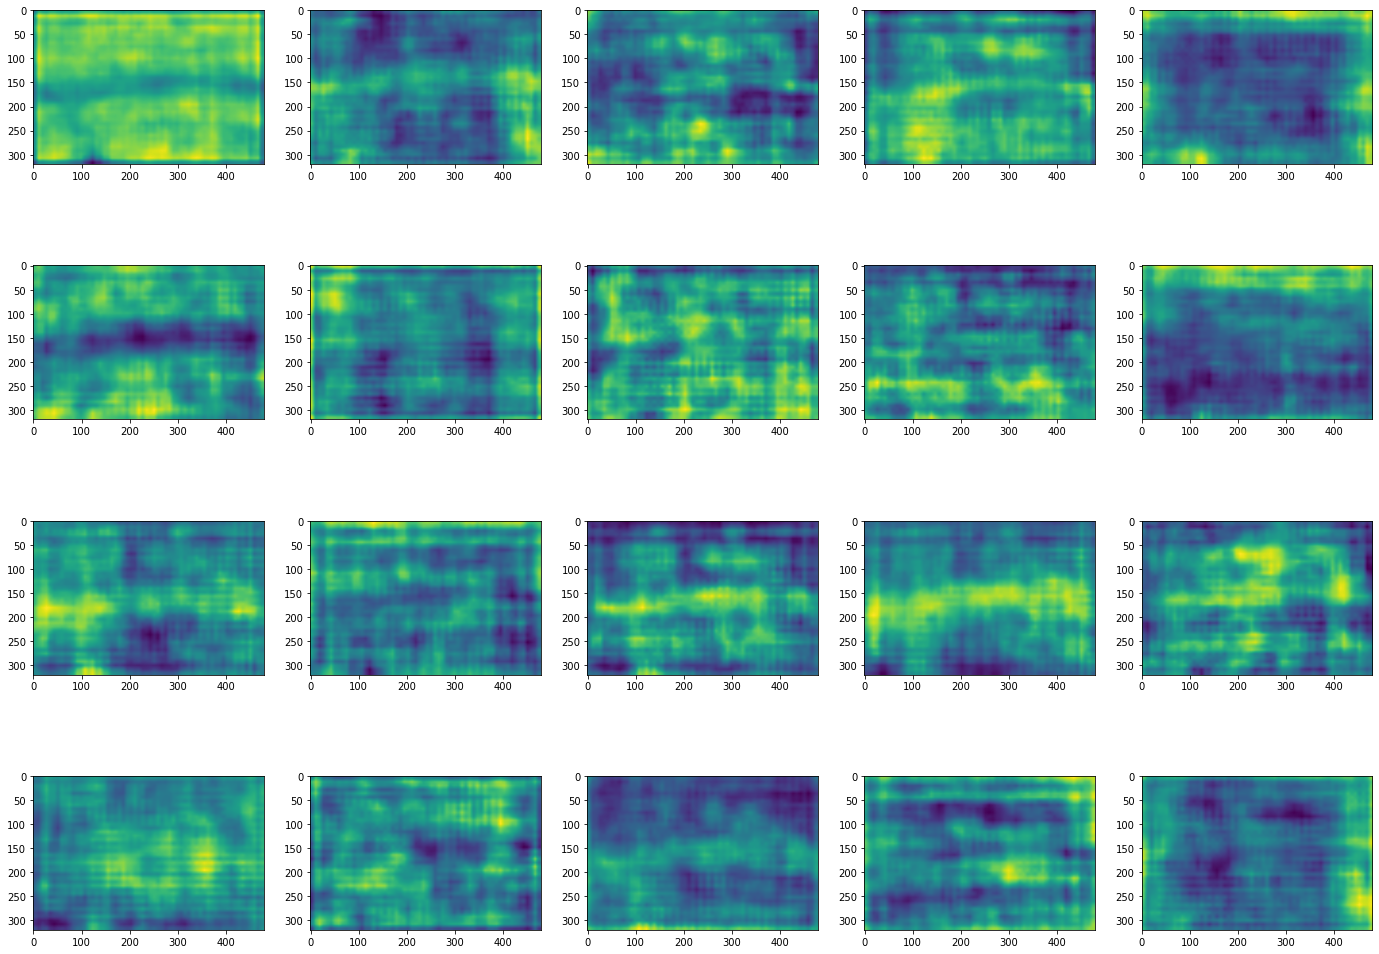

In [10]:
f=plt.figure(figsize=(24,18))
for i in range(20):
    
    f.add_subplot(4,5,i+1)
    plt.imshow(output[i])


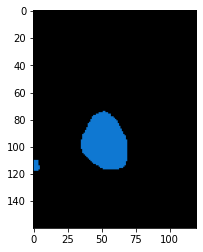

In [6]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

plt.imshow(r)


In [1]:
# Define model
import torch
import t
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = TheModelClass()

# Initialize optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

NameError: name 'nn' is not defined